# 🛍️ **E-commerce Customer Segmentation and Prediction**

This project aims to enhance marketing strategies and customer retention for an e-commerce company by gaining a deeper understanding of their customer base based on their purchasing patter. By leveraging machine learning, the project seeks to segment customers and predict future purchasing behavior. The goal is to develop a **robust customer segmentation model**and a **predictive classifier** to categorize customers based on their purchasing patterns, enabling the company to tailor marketing strategies, improve customer retention, and optimize inventory management.



# New Section

## **1. Data Loading and Exploration**


*   Data Loading, Exploration refers to the process of importing the dataset, examining its structure and contents, and applying initial cleaning steps like handling missing values and removing duplicates.
*   This stage prepares the data for analysis or modeling by ensuring it's structured, consistent, and free from basic issues.




In [1]:
import pandas as pd

ecom_df = pd.read_csv('data.csv', encoding='ISO-8859-1')
ecom_df.info() #This provides  the concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [2]:
ecom_df.describe() #Generates discriptive statistics of numericaol column

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [3]:
ecom_df.isnull().sum() #Shows the number of missing values for each column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
ecom_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
#Handles the missing value and updates the DataFrame
ecom_df = ecom_df[ecom_df['CustomerID'].notnull()]
ecom_df['Description'] = ecom_df['Description'].fillna('Missing')

In [5]:
ecom_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## **2. Feature Engineering**


*   Feature Engineering is the process of creating, transforming, or selecting relevant features (columns) to improve a model's performance.
*   It involves techniques like encoding categorical variables, scaling, combining features, or extracting new ones from existing data.



In [6]:
from datetime import datetime

ecom_df['InvoiceDate'] = pd.to_datetime(ecom_df['InvoiceDate'], errors='coerce')
ecom_df['TotalPrice'] = ecom_df['UnitPrice'] * ecom_df['Quantity']
ecom_df['IsCancelled'] = ecom_df['InvoiceNo'].apply(lambda x: 1 if str(x).startswith('C') else 0)
ecom_df.reset_index(drop=True, inplace=True)

grouped_by_customer = ecom_df.groupby('CustomerID')
reference_date = ecom_df['InvoiceDate'].max()

recency_in_days = (reference_date - grouped_by_customer['InvoiceDate'].max()).dt.days
total_order_frequency = grouped_by_customer['InvoiceNo'].nunique()
total_monetary_value = grouped_by_customer['TotalPrice'].sum()
average_basket_size = grouped_by_customer['Quantity'].sum() / total_order_frequency
average_order_value = total_monetary_value / total_order_frequency
distinct_product_count = grouped_by_customer['StockCode'].nunique()
total_quantity_purchased = grouped_by_customer['Quantity'].sum()
first_purchase_date = grouped_by_customer['InvoiceDate'].min()
last_purchase_date = grouped_by_customer['InvoiceDate'].max()
customer_lifetime_in_days = (last_purchase_date - first_purchase_date).dt.days
average_days_between_orders = grouped_by_customer['InvoiceDate'].apply(
    lambda x: x.sort_values().diff().dt.days.mean())
average_unit_price = grouped_by_customer['UnitPrice'].mean()
cancelled_orders = ecom_df[ecom_df['IsCancelled'] == 1].groupby('CustomerID')['InvoiceNo'].nunique()
return_rate = (cancelled_orders / total_order_frequency).fillna(0)
customer_country = grouped_by_customer['Country'].first()
unique_products_per_order = ecom_df.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].nunique()
average_product_variety_per_order = unique_products_per_order.groupby('CustomerID').mean()

def calculate_reorder_rate(stock_codes_series):
    product_counts = stock_codes_series.value_counts()
    reordered_items = product_counts[product_counts > 1].sum()
    total_items = product_counts.sum()
    return reordered_items / total_items if total_items > 0 else 0

frequent_reorder_rate = ecom_df.groupby('CustomerID')['StockCode'].apply(calculate_reorder_rate)


The above code then calculates various features commonly used in customer segmentation, particularly RFM (Recency, Frequency, Monetary) features and others:


| Feature Name                                | Description                                         |
| ------------------------------------------- | --------------------------------------------------- |
| `recency_in_days`                           | Days since the last purchase.                       |
| `total_order_frequency`                     | Number of unique invoices per customer.             |
| `total_monetary_value`                      | Sum of TotalPrice per customer.                     |
| `average_basket_size`                       | Average quantity per order.                         |
| `average_order_value`                       | Average monetary value per order.                   |
| `distinct_product_count`                    | Number of unique products purchased.                |
| `total_quantity_purchased`                  | Total quantity purchased.                           |
| `first_purchase_date`, `last_purchase_date` | First and last purchase dates.                      |
| `customer_lifetime_in_days`                 | Difference between last and first purchase dates.   |
| `average_days_between_orders`               | Average time between orders.                        |
| `average_unit_price`                        | Average unit price paid.                            |
| `cancelled_orders`                          | Count of cancelled orders per customer.             |
| `return_rate`                               | Proportion of cancelled orders.                     |
| `customer_country`                          | The country of the customer.                        |
| `average_product_variety_per_order`         | Average number of unique products per order.        |
| `frequent_reorder_rate`                     | Rate of reordered items based on a custom function. |


In [7]:
# Creating a DataFrame combining the features created
customer_segmentation_df = pd.DataFrame({
    'CustomerID': recency_in_days.index,
    'RecencyInDays': recency_in_days.values,
    'TotalOrderFrequency': total_order_frequency.values,
    'TotalMonetaryValue': total_monetary_value.values,
    'AverageBasketSize': average_basket_size.values,
    'AverageOrderValue': average_order_value.values,
    'DistinctProductCount': distinct_product_count.values,
    'TotalQuantityPurchased': total_quantity_purchased.values,
    'FirstPurchaseDate': first_purchase_date.values,
    'LastPurchaseDate': last_purchase_date.values,
    'CustomerLifetimeInDays': customer_lifetime_in_days.values,
    'AverageDaysBetweenOrders': average_days_between_orders.values,
    'AverageUnitPrice': average_unit_price.values,
    'ReturnRate': return_rate.values,
    'CustomerCountry': customer_country.values,
    'AverageProductVarietyPerOrder': average_product_variety_per_order.values,
    'FrequentReorderRate': frequent_reorder_rate.values
})

customer_segmentation_df.reset_index(drop=True, inplace=True)

In [8]:
customer_segmentation_df.isnull().sum()

CustomerID                        0
RecencyInDays                     0
TotalOrderFrequency               0
TotalMonetaryValue                0
AverageBasketSize                 0
AverageOrderValue                 0
DistinctProductCount              0
TotalQuantityPurchased            0
FirstPurchaseDate                 0
LastPurchaseDate                  0
CustomerLifetimeInDays            0
AverageDaysBetweenOrders         79
AverageUnitPrice                  0
ReturnRate                        0
CustomerCountry                   0
AverageProductVarietyPerOrder     0
FrequentReorderRate               0
dtype: int64

In [9]:
# Handle any remaining nulls this happened because a customer may have only oine order in his lifetime
customer_segmentation_df['AverageDaysBetweenOrders'] = customer_segmentation_df['AverageDaysBetweenOrders'].fillna(0)

In [10]:
customer_segmentation_df.isnull().sum()

CustomerID                       0
RecencyInDays                    0
TotalOrderFrequency              0
TotalMonetaryValue               0
AverageBasketSize                0
AverageOrderValue                0
DistinctProductCount             0
TotalQuantityPurchased           0
FirstPurchaseDate                0
LastPurchaseDate                 0
CustomerLifetimeInDays           0
AverageDaysBetweenOrders         0
AverageUnitPrice                 0
ReturnRate                       0
CustomerCountry                  0
AverageProductVarietyPerOrder    0
FrequentReorderRate              0
dtype: int64

## **3. Data Preprocessing & Outlier Treatment**
* Data Preprocessing & Outlier Treatment involves cleaning the dataset by handling missing values, correcting data types, and transforming features for consistency.
* Outlier treatment detects and manages extreme values to reduce their negative impact on analysis or model performance

In [11]:
import numpy as np

customer_segmentation_data = customer_segmentation_df.dropna(subset=['CustomerID'])

# Drop unnecessary columns
customer_segmentation_data = customer_segmentation_data.drop(columns=[
    'CustomerID', 'FirstPurchaseDate', 'LastPurchaseDate', 'CustomerCountry'])

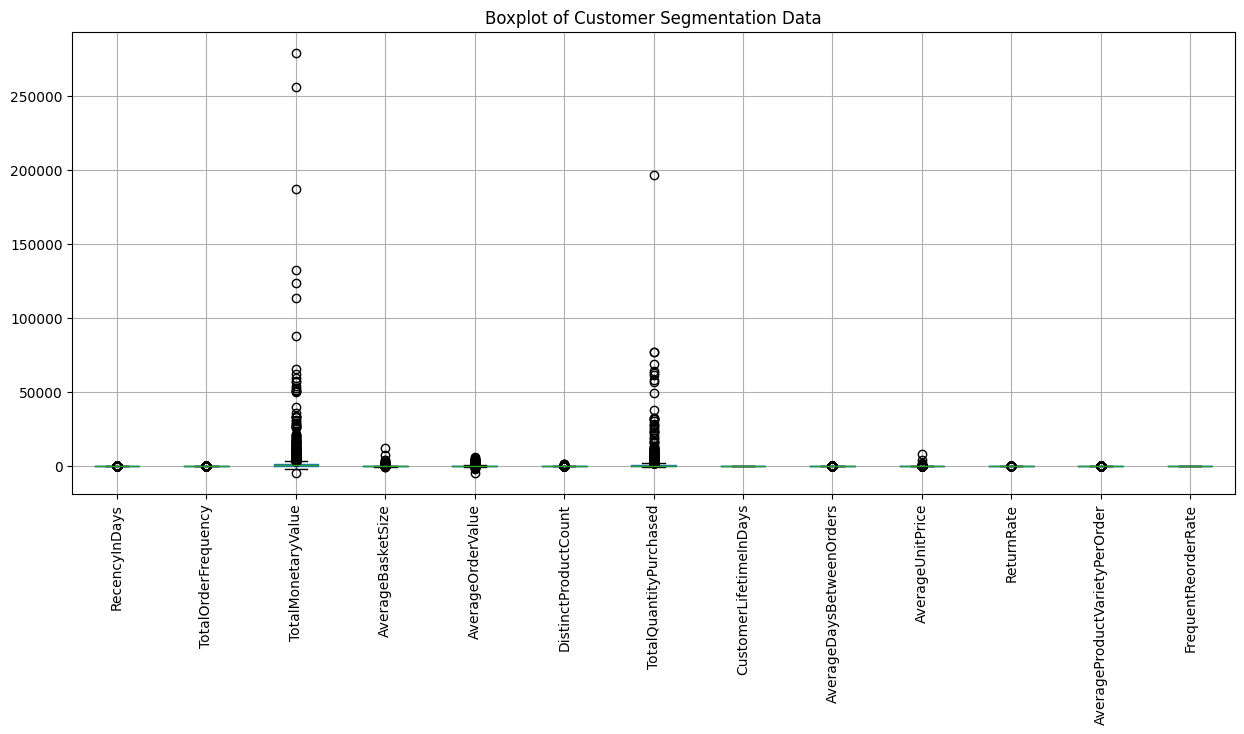

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#Visualization of Outliers

plt.figure(figsize=(15, 6))
customer_segmentation_data.boxplot(rot=90)
plt.title("Boxplot of Customer Segmentation Data")
plt.show()

In [13]:
# IQR Outlier Capping
numerical_cols = customer_segmentation_data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = customer_segmentation_data[col].quantile(0.25)
    Q3 = customer_segmentation_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    customer_segmentation_data[col] = np.where(customer_segmentation_data[col] < lower_limit, lower_limit,
                                np.where(customer_segmentation_data[col] > upper_limit, upper_limit,
                                         customer_segmentation_data[col]))

### **Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_array = scaler.fit_transform(customer_segmentation_data)
scaled_df = pd.DataFrame(scaled_array, columns=customer_segmentation_data.columns)


## **4. Dimensionality Reduction for Visualization**
* Dimensionality reduction simplifies high-dimensional data into 2D or 3D while preserving key patterns and structure.
* Techniques like PCA or t-SNE help visualize clusters and reveal hidden groupings in the data.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

## **5. Clustering Model**
* The clustering model groups similar data points into clusters based on feature similarity without using labeled outcomes.
* This step involves selecting a suitable algorithm (e.g., K-Means), fitting it to the data, and assigning cluster labels to each observation.

### **5.1 Determining the Optimal Number of Cluster**
* To build meaningful clusters, it's essential to find the ideal number of clusters that best separates the data.
* Techniques like the Elbow Method and Silhouette Score help evaluate clustering quality and guide this choice.

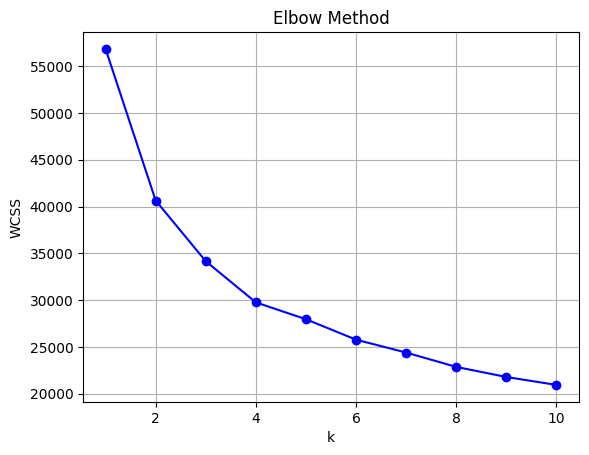

k=2 | Silhouette: 0.282 | DB Index: 1.422
k=3 | Silhouette: 0.221 | DB Index: 1.600
k=4 | Silhouette: 0.215 | DB Index: 1.473
k=5 | Silhouette: 0.193 | DB Index: 1.632
k=6 | Silhouette: 0.203 | DB Index: 1.553
k=7 | Silhouette: 0.197 | DB Index: 1.606
k=8 | Silhouette: 0.181 | DB Index: 1.552
k=9 | Silhouette: 0.181 | DB Index: 1.547
k=10 | Silhouette: 0.178 | DB Index: 1.528


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Silhouette and DB Index
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    sil_score = silhouette_score(scaled_df, labels)
    db_score = davies_bouldin_score(scaled_df, labels)
    print(f'k={k} | Silhouette: {sil_score:.3f} | DB Index: {db_score:.3f}')

Based on the Elbow Method, the WCSS curve shows a noticeable bend around k = 4 to 5, indicating that adding more clusters beyond this gives diminishing returns.

The Silhouette Score is highest at k = 2 (0.282) but gradually declines, with k = 5 still maintaining a moderate score of 0.193, indicating reasonable cluster cohesion.

The Davies-Bouldin Index is lowest at k = 2 (1.422) but remains acceptable at k = 5 (1.632), suggesting fair cluster separation.

Choosing k = 5 provides a balance between model interpretability and richer customer segmentation.

### **5.2 Applying Clustering Algorithms**
Apply multiple methods to compare performance.

#### **5.2.1 K-Means Clustering**
Apply K-Means to partition the dataset into K clusters by minimizing within-cluster variance.

In [17]:
from sklearn.cluster import KMeans

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_segmentation_data['KMeansCluster'] = kmeans.fit_predict(scaled_df)

#### **5.2.2 DBSCAN Clustering**

In [18]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
customer_segmentation_data['AggloCluster'] = agglo.fit_predict(scaled_df)


#### **5.2.3 Agglomerative (Hierarchical) Clustering**

In [19]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.2, min_samples=5)
customer_segmentation_data['DBSCANCluster'] = dbscan.fit_predict(scaled_df)


### **5.3 Cluster Visualization**


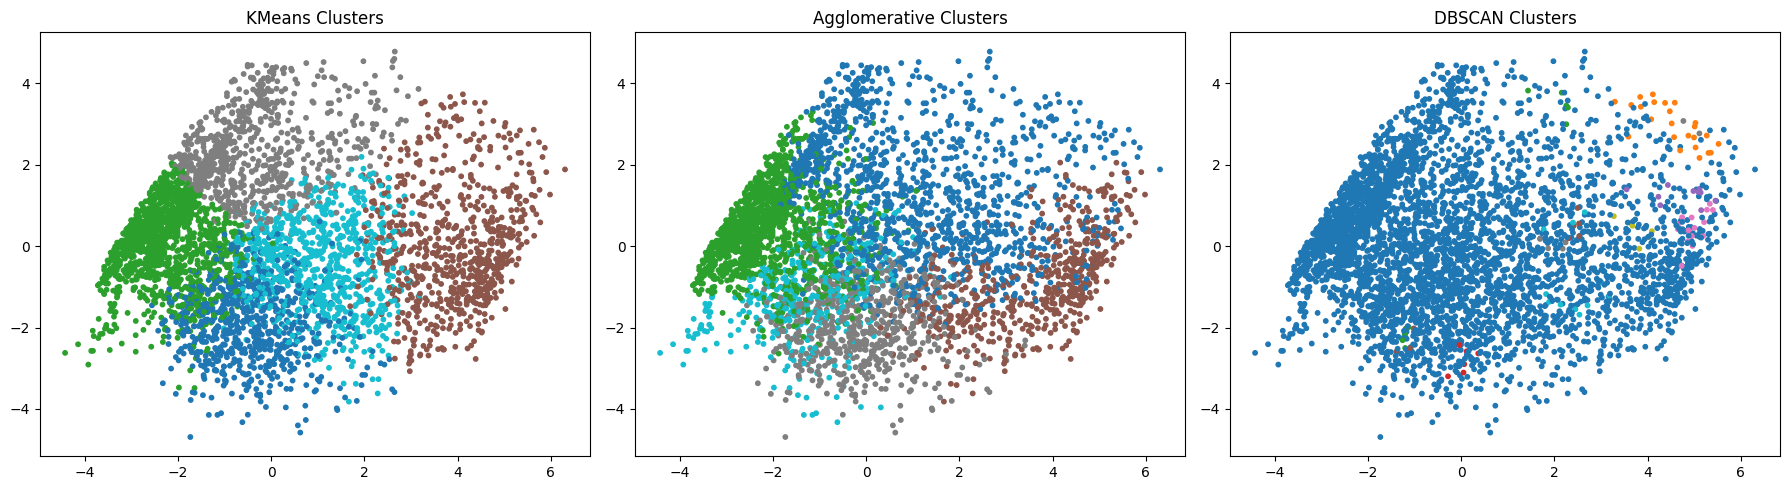

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(pca_df['PCA1'], pca_df['PCA2'], c=customer_segmentation_data['KMeansCluster'], cmap='tab10', s=10)
axes[0].set_title("KMeans Clusters")

axes[1].scatter(pca_df['PCA1'], pca_df['PCA2'], c=customer_segmentation_data['AggloCluster'], cmap='tab10', s=10)
axes[1].set_title("Agglomerative Clusters")

axes[2].scatter(pca_df['PCA1'], pca_df['PCA2'], c=customer_segmentation_data['DBSCANCluster'], cmap='tab10', s=10)
axes[2].set_title("DBSCAN Clusters")

plt.tight_layout()
plt.show()

## **5.4 Cluster Counts and Insights**

In [21]:
print("🔹 KMeans Cluster Counts:")
print(customer_segmentation_data['KMeansCluster'].value_counts().sort_index())

print("\n🔸 Agglomerative Cluster Counts:")
print(customer_segmentation_data['AggloCluster'].value_counts().sort_index())

print("\n🔻 DBSCAN Cluster Counts:")
print(customer_segmentation_data['DBSCANCluster'].value_counts().sort_index())

print("\n❌ DBSCAN Noise Points:", (customer_segmentation_data['DBSCANCluster'] == -1).sum())

🔹 KMeans Cluster Counts:
KMeansCluster
0     745
1    1350
2     723
3     762
4     792
Name: count, dtype: int64

🔸 Agglomerative Cluster Counts:
AggloCluster
0    1322
1    1400
2     570
3     643
4     437
Name: count, dtype: int64

🔻 DBSCAN Cluster Counts:
DBSCANCluster
-1     1105
 0     3167
 1       24
 2        7
 3        5
 4        6
 5       10
 6        5
 7        5
 8       16
 9        2
 10       4
 11       5
 12       3
 13       8
Name: count, dtype: int64

❌ DBSCAN Noise Points: 1105


### **KMeans**

Formed 5 fairly balanced clusters, sizes range from 723 to 1350.
Indicates compact and well-separated groupings in the data.

**Insight:** KMeans is effective for this dataset and gives interpretable, consistent clusters.

---

### **Agglomerative Clustering**

Also produced 5 clusters, but with some imbalance (one cluster has 1400 points).
Suggests possible chaining effect or merging of nearby groups.

**Insight:** Agglomerative works, but may blur boundaries between distinct segments.

---

### **DBSCAN**

Detected many small clusters and labeled 1105 points as noise.
Most data points fell into one large cluster, others were sparsely scattered.

**Insight:** DBSCAN is great for spotting outliers but not ideal for primary clustering here without tuning.

***KMeans is the best fit for clean and interpretable segmentation, while DBSCAN can be used alongside it to identify noise or anomalies.***


### **5.5 Cluster Profiling**

The following table shows the average feature values per KMeans cluster, helping us interpret the characteristics of each customer group. It highlights differences in purchase behavior such as frequency, recency, and order value.


In [22]:
# Group by cluster and describe characteristics
cluster_profile = customer_segmentation_data.groupby('KMeansCluster').mean(numeric_only=True)
print(cluster_profile)

               RecencyInDays  TotalOrderFrequency  TotalMonetaryValue  \
KMeansCluster                                                           
0                  64.151678             3.695302          662.471825   
1                 166.342222             1.519259          272.504222   
2                  24.110650             9.121715         3235.645897   
3                  97.116798             1.607612          865.789017   
4                  37.786616             5.683081         1299.750910   

               AverageBasketSize  AverageOrderValue  DistinctProductCount  \
KMeansCluster                                                               
0                      97.899379         183.882855             23.008054   
1                      97.353552         189.350268             17.318519   
2                     253.986391         414.249948            119.632089   
3                     313.662372         463.422364             53.162730   
4                     145.

The following section provides a descriptive summary of each customer segment based on KMeans clustering results.

---

#### **Cluster 0 — Moderate Shoppers**

**Profile**  
- Medium recency (`~64 days`)  
- Moderate frequency (`~3.7`)  
- Mid-range spend (`~₹660`), average basket size  
- Moderate product variety and reorder rate  

**Label:** Moderate Shoppers  
**Insight:** Consistent but average buyers with steady purchase behavior.

---

#### **Cluster 1 — Churned or One-Time Customers**

**Profile**  
- Very high recency (`~166 days`)  
- Very low frequency (`~1.5`), low spend (`~₹272`)  
- Very short customer lifetime (`~12 days`), low reorder rate  

**Label:** Churned or One-Time Customers  
**Insight:** Inactive users who likely made only one purchase and didn’t return.

---

#### **Cluster 2 — Premium Loyalists**

**Profile**  
- Very recent recency (`~24 days`)  
- Very high frequency (`~9.1`), very high spend (`~₹3235`)  
- High reorder rate (`~0.59`), long customer lifetime (`~290 days`)  
- Wide product variety  

**Label:** Premium Loyalists  
**Insight:** Your most valuable and engaged customers.

---

#### **Cluster 3 — Infrequent Big Spenders**
**bold text**
**Profile**  
- Average recency (`~97 days`), very low frequency (`~1.6`)  
- High spend (`~₹865`) with large basket size  
- Highest product variety (`~32`), very low return rate  

**Label:** Infrequent Big Spenders  
**Insight:** Rare buyers who make large, impactful purchases.

---

#### **Cluster 4 — High-Value Frequent Buyers**

**Profile**  
- Recent recency (`~38 days`), good frequency (`~5.6`)  
- High spend (`~₹1300`), long customer lifetime (`~215 days`)  
- Strong reorder rate (`~0.39`), good product variety  

**Label:** High-Value Frequent Buyers  
**Insight:** Reliable, valuable customers who shop frequently with consistent value.

---

In [23]:
cluster_labels = {
    0: "Moderate Shoppers",
    1: "Churned or One-Time Customers",
    2: "Premium Loyalists",
    3: "Infrequent Big Spenders",
    4: "High-Value Frequent Buyers"
}

In [24]:
# Map the numeric cluster to the insight label
customer_segmentation_data['KMeansSegmentLabel'] = customer_segmentation_data['KMeansCluster'].map(cluster_labels)

In [25]:
customer_segmentation_df['CustomerSegment'] = customer_segmentation_data['KMeansSegmentLabel']

In [26]:
customer_segmentation_df

,CustomerID,RecencyInDays,TotalOrderFrequency,TotalMonetaryValue,AverageBasketSize,AverageOrderValue,DistinctProductCount,TotalQuantityPurchased,FirstPurchaseDate,LastPurchaseDate,CustomerLifetimeInDays,AverageDaysBetweenOrders,AverageUnitPrice,ReturnRate,CustomerCountry,AverageProductVarietyPerOrder,FrequentReorderRate,CustomerSegment
0,12346.0,325,2,0.00,0.000000,0.000000,1,0,2011-01-18 10:01:00,2011-01-18 10:17:00,0,0.000000,1.040000,0.500000,United Kingdom,1.000000,1.000000,Churned or One-Time Customers
1,12347.0,1,7,4310.00,351.142857,615.714286,103,2458,2010-12-07 14:57:00,2011-12-07 15:52:00,365,2.000000,2.644011,0.000000,Iceland,26.000000,0.670330,Premium Loyalists
2,12348.0,74,4,1797.24,585.250000,449.310000,22,2341,2010-12-16 19:09:00,2011-09-25 13:13:00,282,9.400000,5.764839,0.000000,Finland,6.750000,0.516129,Premium Loyalists
3,12349.0,18,1,1757.55,631.000000,1757.550000,73,631,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000,8.289041,0.000000,Italy,73.000000,0.000000,Infrequent Big Spenders
4,12350.0,309,1,334.40,197.000000,334.400000,17,197,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000,3.841176,0.000000,Norway,17.000000,0.000000,Churned or One-Time Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,45.000000,180.600000,10,45,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000,4.765000,0.000000,United Kingdom,10.000000,0.000000,Churned or One-Time Customers
4368,18281.0,180,1,80.82,54.000000,80.820000,7,54,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000,5.622857,0.000000,United Kingdom,7.000000,0.000000,Churned or One-Time Customers
4369,18282.0,7,3,176.60,32.666667,58.866667,12,98,2011-08-05 13:35:00,2011-12-02 11:43:00,118,9.833333,4.821538,0.333333,United Kingdom,4.333333,0.153846,Moderate Shoppers
4370,18283.0,3,16,2094.88,87.312500,130.930000,263,1397,2011-01-06 14:14:00,2011-12-06 12:02:00,333,0.433113,1.614987,0.000000,United Kingdom,43.062500,0.838624,Premium Loyalists


In [27]:
# The final customer segmentation results are saved to a CSV file for future analysis, reporting, or integration with other systems.
customer_segmentation_df.to_csv("customer_segmentation.csv", index=False)

## **6. Supervised Modeling: Multi-Classifier Evaluation**
* This step involves applying multiple supervised learning algorithms to predict customer segments based on behavioral features.  
* The goal is to compare model performance and identify the most accurate classifier for future segment prediction.


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load data
customer_df = pd.read_csv("customer_segmentation.csv")

# Drop unneeded columns
customer_df.drop(['CustomerID', 'FirstPurchaseDate', 'LastPurchaseDate'], axis=1, inplace=True)

# Encode categorical
le_country = LabelEncoder()
customer_df['CustomerCountry'] = le_country.fit_transform(customer_df['CustomerCountry'])

joblib.dump(le_country, 'label_encoder_country.pkl')

le_segment = LabelEncoder()
customer_df['CustomerSegment'] = le_segment.fit_transform(customer_df['CustomerSegment'])

# These lines save the fitted label encoders for country and segment, enabling consistent encoding during future predictions.
joblib.dump(le_segment, 'label_encoder_segment.pkl')

# Features and target
X = customer_df.drop(['CustomerSegment'], axis=1)
y = customer_df['CustomerSegment']

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)


#### **6.1 Support Vector Machine (SVM)**
A supervised learning model that aims to find the optimal hyperplane that best separates the data into classes.  
Effective for high-dimensional spaces and when classes are well-separated.

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)

print("\n SVM Classifier")
print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds, target_names=le_segment.classes_))


 SVM Classifier
[[269   3   2   0   0]
 [  5 141   0   3   8]
 [ 14   4 126   0   4]
 [  2   6   0 146   1]
 [  0   7   3   2 129]]
                               precision    recall  f1-score   support

Churned or One-Time Customers       0.93      0.98      0.95       274
   High-Value Frequent Buyers       0.88      0.90      0.89       157
      Infrequent Big Spenders       0.96      0.85      0.90       148
            Moderate Shoppers       0.97      0.94      0.95       155
            Premium Loyalists       0.91      0.91      0.91       141

                     accuracy                           0.93       875
                    macro avg       0.93      0.92      0.92       875
                 weighted avg       0.93      0.93      0.93       875



#### **6.2 K-Nearest Neighbors (KNN)**
A distance-based algorithm that classifies data points based on the majority label of their nearest neighbors.  
Simple and interpretable, but sensitive to feature scaling and data distribution.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)

print("\n KNN Classifier")
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds, target_names=le_segment.classes_))



 KNN Classifier
[[265   4   1   4   0]
 [  8 126   3  10  10]
 [ 21   8 116   0   3]
 [  6  14   0 135   0]
 [  0  20   7   2 112]]
                               precision    recall  f1-score   support

Churned or One-Time Customers       0.88      0.97      0.92       274
   High-Value Frequent Buyers       0.73      0.80      0.77       157
      Infrequent Big Spenders       0.91      0.78      0.84       148
            Moderate Shoppers       0.89      0.87      0.88       155
            Premium Loyalists       0.90      0.79      0.84       141

                     accuracy                           0.86       875
                    macro avg       0.86      0.84      0.85       875
                 weighted avg       0.87      0.86      0.86       875



#### **6.3 Random Forest Classifier**
An ensemble learning method that builds multiple decision trees and merges their results for improved accuracy and stability.  
It handles non-linear relationships well and reduces overfitting compared to single decision trees.


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_raw, y_train)
rf_preds = rf_model.predict(X_test_raw)

print("\n Random Forest Classifier")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds, target_names=le_segment.classes_))


 Random Forest Classifier
[[259   5   9   1   0]
 [  2 143   3   3   6]
 [  8   2 138   0   0]
 [  2   4   0 149   0]
 [  0   3   1   0 137]]
                               precision    recall  f1-score   support

Churned or One-Time Customers       0.96      0.95      0.95       274
   High-Value Frequent Buyers       0.91      0.91      0.91       157
      Infrequent Big Spenders       0.91      0.93      0.92       148
            Moderate Shoppers       0.97      0.96      0.97       155
            Premium Loyalists       0.96      0.97      0.96       141

                     accuracy                           0.94       875
                    macro avg       0.94      0.94      0.94       875
                 weighted avg       0.94      0.94      0.94       875



#### **6.4 Gradient Boosting Classifier (GBC)**
A boosting algorithm that builds models sequentially, where each new model corrects the errors of the previous one.  
Powerful for tabular data, with high accuracy and good handling of complex patterns.

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_raw, y_train)  # You can also use scaled data
gb_preds = gb_model.predict(X_test_raw)

print("\n Gradient Boosting Classifier")
print(confusion_matrix(y_test, gb_preds))
print(classification_report(y_test, gb_preds, target_names=le_segment.classes_))


 Gradient Boosting Classifier
[[262   5   6   1   0]
 [  1 148   2   5   1]
 [  8   1 139   0   0]
 [  1   5   0 149   0]
 [  0   4   0   0 137]]
                               precision    recall  f1-score   support

Churned or One-Time Customers       0.96      0.96      0.96       274
   High-Value Frequent Buyers       0.91      0.94      0.93       157
      Infrequent Big Spenders       0.95      0.94      0.94       148
            Moderate Shoppers       0.96      0.96      0.96       155
            Premium Loyalists       0.99      0.97      0.98       141

                     accuracy                           0.95       875
                    macro avg       0.95      0.95      0.95       875
                 weighted avg       0.95      0.95      0.95       875



#### **6.5 Model Performance Comparison**

The following table summarizes the evaluation metrics (Accuracy, F1 Macro, and F1 Weighted) for all classifiers used.  
This helps identify the best-performing model for customer segment prediction.


In [33]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Create a comparison dictionary
comparison = {
    "Model": ["SVM", "KNN", "Random Forest", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, svm_preds),
        accuracy_score(y_test, knn_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, gb_preds)
    ],
    "F1 Macro": [
        f1_score(y_test, svm_preds, average='macro'),
        f1_score(y_test, knn_preds, average='macro'),
        f1_score(y_test, rf_preds, average='macro'),
        f1_score(y_test, gb_preds, average='macro')
    ],
    "F1 Weighted": [
        f1_score(y_test, svm_preds, average='weighted'),
        f1_score(y_test, knn_preds, average='weighted'),
        f1_score(y_test, rf_preds, average='weighted'),
        f1_score(y_test, gb_preds, average='weighted')
    ]
}

# Convert to DataFrame and display
comparison_df = pd.DataFrame(comparison)
print(comparison_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


               Model  Accuracy  F1 Macro  F1 Weighted
0  Gradient Boosting  0.954286  0.954090     0.954433
1      Random Forest  0.944000  0.943337     0.944050
2                SVM  0.926857  0.921966     0.926543
3                KNN  0.861714  0.851479     0.861270


### **6.6 Model Evaluation Insights**

The following table summarizes the evaluation metrics for all classifiers used:

---

### **Key Insights per Model**

- **Gradient Boosting Classifier (GBC):**  
  Achieved the highest scores across all metrics, indicating exceptional accuracy and class balance.  
  Great at handling complex feature interactions — ideal for final deployment.

- **Random Forest:**  
  Very strong performance with high stability and generalization.  
  Slightly lower than GBC but still highly reliable.

- **Support Vector Machine (SVM):**  
  Delivers solid results but lags slightly behind ensemble models.  
  Works well in high-dimensional space, but may not scale as efficiently.

- **K-Nearest Neighbors (KNN):**  
  Lowest performer among the four, especially in F1 Macro (suggesting weaker handling of minority classes).  
  Simpler model, but sensitive to feature scaling and not ideal for large or complex datasets.

---

### ✅ Model Selection Insight

**Gradient Boosting Classifier**  is the top performer across all key metrics and is best suited as the final predictive model.  
Its high accuracy and balanced F1 scores across classes make it highly effective for segment prediction in this multi-class customer classification task.


## **6.7 Hyperparameter Tuning: Gradient Boosting Optimization**
* This step performs an exhaustive Grid Search to find the best hyperparameters for the Gradient Boosting Classifier.  
* The optimized model is evaluated to assess improvements in performance compared to the baseline version.


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

# Create base model
gb = GradientBoostingClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_search.fit(X_train_raw, y_train)

# Best model
best_gb_model = grid_search.best_estimator_

# Predict
tuned_preds = best_gb_model.predict(X_test_raw)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("\n🔧 Tuned Gradient Boosting")
print("Best Parameters:", grid_search.best_params_)
print(confusion_matrix(y_test, tuned_preds))
print(classification_report(y_test, tuned_preds, target_names=le_segment.classes_))


Fitting 5 folds for each of 72 candidates, totalling 360 fits

🔧 Tuned Gradient Boosting
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
[[261   6   6   1   0]
 [  2 149   1   3   2]
 [  8   2 138   0   0]
 [  1   4   0 150   0]
 [  0   4   0   0 137]]
                               precision    recall  f1-score   support

Churned or One-Time Customers       0.96      0.95      0.96       274
   High-Value Frequent Buyers       0.90      0.95      0.93       157
      Infrequent Big Spenders       0.95      0.93      0.94       148
            Moderate Shoppers       0.97      0.97      0.97       155
            Premium Loyalists       0.99      0.97      0.98       141

                     accuracy                           0.95       875
                    macro avg       0.95      0.95      0.95       875
                 weighted avg       0.95      0.95      0.95       875



## **Tuned Gradient Boosting Model Evaluation**

### **Best Hyperparameters**

The following hyperparameters were selected using 5-fold Grid Search Cross-Validation:

```python
{
    'learning_rate': 0.05,
    'max_depth': 3,
    'min_samples_split': 5,
    'n_estimators': 200,
    'subsample': 0.8
}
```

### **Overall Performance**

| Metric         | Value |
| -------------- | ----- |
| Accuracy       | 0.95  |
| Macro F1 Score | 0.95  |
| Weighted F1    | 0.95  |
| Total Samples  | 875   |

---

### **Confusion Matrix (Raw Counts)**

```
[[261   6   6   1   0]
 [  2 149   1   3   2]
 [  8   2 138   0   0]
 [  1   4   0 150   0]
 [  0   4   0   0 137]]
```

**Rows** represent actual class, **columns** represent predicted class.

---

### **Class-wise Performance**

| Segment                       | Precision | Recall | F1-Score | Support |
| ----------------------------- | --------- | ------ | -------- | ------- |
| Churned or One-Time Customers | 0.96      | 0.95   | 0.96     | 274     |
| High-Value Frequent Buyers    | 0.90      | 0.95   | 0.93     | 157     |
| Infrequent Big Spenders       | 0.95      | 0.93   | 0.94     | 148     |
| Moderate Shoppers             | 0.97      | 0.97   | 0.97     | 155     |
| Premium Loyalists             | 0.99      | 0.97   | 0.98     | 141     |

---

### **Insights**

* The model achieved high performance across all customer segments with balanced precision and recall.
* Misclassifications were minimal and mostly occurred between neighboring or behaviorally similar groups (e.g., High-Value Frequent Buyers and Infrequent Big Spenders).
* The model is especially effective at identifying Premium Loyalists and Churned Customers, which are critical for customer retention and lifetime value analysis.
* No single class shows signs of being underrepresented or heavily misclassified.

---

### **Suitability for Deployment**

The model shows:

* High generalization ability (validated with cross-validation).
* Balanced performance across diverse customer segments.
* Strong potential for use in downstream applications such as:

  * Churn prediction workflows
  * Customer segmentation dashboards
  * Personalized marketing strategies


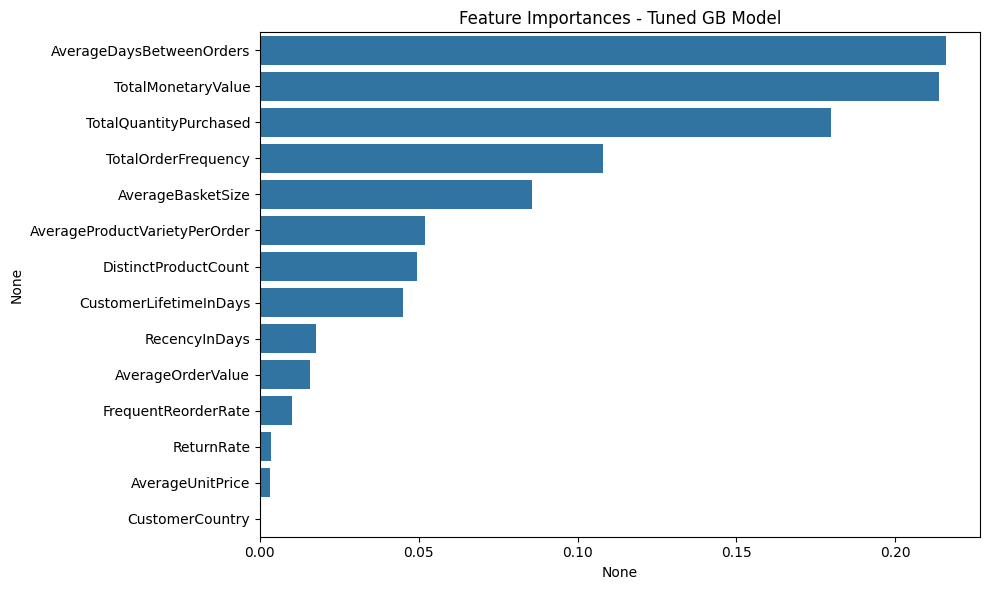

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
'''This plot visualizes the most influential features used by the
tuned Gradient Boosting model to predict customer segment'''

feature_importance = pd.Series(best_gb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.sort_values(ascending=False),
            y=feature_importance.sort_values(ascending=False).index)
plt.title("Feature Importances - Tuned GB Model")
plt.tight_layout()
plt.show()


In [36]:
import joblib
#This line saves the tuned Gradient Boosting model as a `.pkl` file so it can be reused later without retraining.
joblib.dump(best_gb_model, "tuned_gradient_boosting_model.pkl")

['tuned_gradient_boosting_model.pkl']